# More Machine Learning

### More Machine Learning
### Kerry Back, JGSB, Rice University

<a target="_blank" href="https://colab.research.google.com/github/kerryback/mgmt638/blob/main/notebooks/09_more_ml.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
colors = sns.color_palette()

### Overview

- 3 data sets
  - randomly generated sine curve with noise
  - randomly generated irrelevant features
  - Boston housing prices (kaggle)
- 4 models
  - random forest
  - neural network
  - linear regression
  - LASSO
- Main topic: overfitting and how to avoid it

### Tuning hyperparameters

- In a random forest, max_depth is a hyperparameter (specified in advance, not fitted by the algorithm).
- In a neural network, hidden_layer_sizes is a hyperparameter.
- There are ways to use the data to select the best hyperparameter, called tuning the hyperparameter.


### Overfitting

- In general, we want to choose a hyperparameter to get the best fit to the data without overfitting.
- More complex models may overfit the data and not work well on new data.  
- We have to assess how well the model and hyperparameter work on data not used in the training.

### Train-test split

- We'll use scikit-learn's train-test-split function.
- Randomly select a subset of the data for training.  The rest is used for testing.
- Can specify test size as a fraction of the whole.

## Dataset 1

In [2]:
# sine curve
def curve(x):
    return 2 * np.sin(2 * x)

# Generate data
np.random.seed(0)
X1 = np.random.uniform(low=-5, high=5, size=(1000, 1))
y1 = curve(X1) + np.random.normal(scale=2, size=(1000, 1))
y1 = y1.flatten()

### Train-test split

In [3]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=0
)

### View

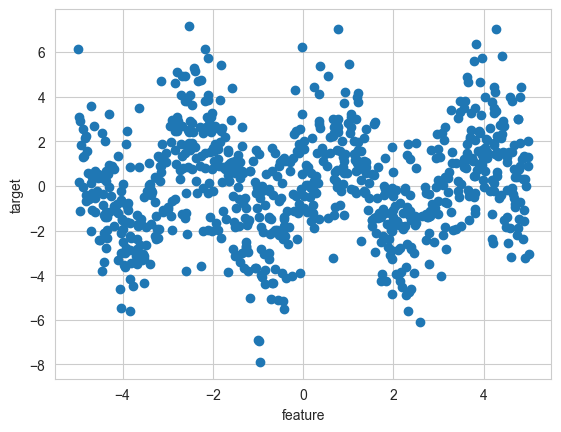

In [4]:
# View training data
plt.scatter(X1_train, y1_train, label="noisy data")
plt.xlabel("feature")
plt.ylabel("target")
plt.show()

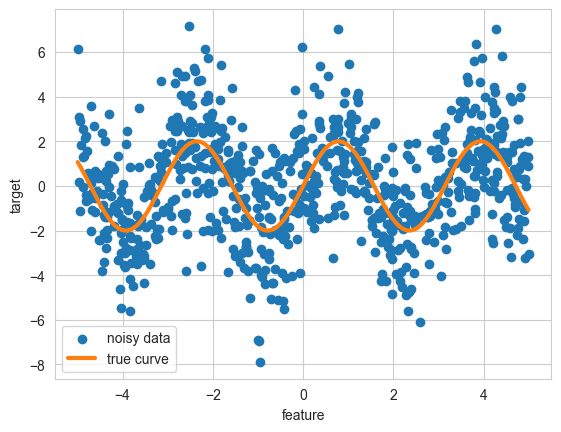

In [5]:
# Training data and true curve
plt.scatter(X1_train, y1_train, label="noisy data")
plt.xlabel("feature")
plt.ylabel("target")
plt.plot(
    np.sort(X1.flatten()),
    curve(np.sort(X1.flatten())), 
    label="true curve", 
    c=colors[1],
    lw=3
)
plt.legend()
plt.show()

## Dataset 2

In [6]:
# Generate 100 features (predictors) and 1000 data points

np.random.seed(0)
X2 = np.random.normal(size=(1000, 100))

# only the first feature will matter
y2 = X2[:, 0] + np.random.normal(size=1000)

### Train-test split

In [7]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=0
)

## Random forests

### Shallow and deep forests for dataset 1

In [8]:
from sklearn.ensemble import RandomForestRegressor

# shallow forest
forest1a = RandomForestRegressor(max_depth=4, random_state=0)
forest1a.fit(X=X1_train, y=y1_train)

# deep forest
forest1b = RandomForestRegressor(max_depth=50, random_state=0)
forest1b.fit(X=X1_train, y=y1_train)

RandomForestRegressor(max_depth=50, random_state=0)

### $R^2$'s of shallow and deep forests for dataset 1

In [9]:
# training data
train1a = forest1a.score(X=X1_train, y=y1_train)
train1b = forest1b.score(X=X1_train, y=y1_train)

# test data
test1a = forest1a.score(X=X1_test, y=y1_test)
test1b = forest1b.score(X=X1_test, y=y1_test)

In [10]:
print(f"R-squared of shallow forest on training data = {train1a:.2%}")
print(f"R-squared of deep forest on training data = {train1b:.2%}")
print("\n")
print(f"R-squared of shallow forest on test data = {test1a:.2%}")
print(f"R-squared of deep forest on test data = {test1b:.2%}")

R-squared of shallow forest on training data = 35.23%
R-squared of deep forest on training data = 86.87%


R-squared of shallow forest on test data = 23.72%
R-squared of deep forest on test data = -4.33%


## Avoid overfitting by cross validation

### Cross validation

- The following can be done by usng GridSearchCV on the training data:
  - Split the training data into five sets (could make more or fewer sets).
  - Combine four sets for training and compute the score on the fifth ("validation") set.
  - Then choose a different one of the five sets for validation and repeat.
  - End up with five validation scores.  Average them.
  - Choose hyperparameter value with highest average validation score.
- To forecast performance on new data, compute the $R^2$ on the test data.
  

### Cross validation explained again

- Split the training data into 5 randomly chosen subsets $A, B, C, D$, and $E$.
- Use $A \cup B \cup C \cup D$ as training data and validate on $E$.  
- Then use $B \cup C \cup D \cup E$ as training data and validate on $A$.  
- Then, ..., until we have trained and validated 5 times.
- Average the 5 validation scores for each model.  
- Choose the hyperparameter value that gives the highest average validation score.  
- Then test on the testing data to estimate performance on new data.

## Cross validate random forest on dataset 1

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": range(2, 22, 2)}
forest_cv1 = GridSearchCV(
    RandomForestRegressor(random_state=0),
    param_grid=param_grid,
)
forest_cv1.fit(X=X1_train, y=y1_train)
print(f"best hyperparameter is {forest_cv1.best_params_}")
print(f"R-squared on the test data is {forest_cv1.score(X=X1_test, y=y1_test): .2%}")

best hyperparameter is {'max_depth': 6}
R-squared on the test data is  24.80%


### See the full cross-validation results if we want

In [12]:
forest_cv1.cv_results_

{'mean_fit_time': array([0.07377267, 0.08717914, 0.09889469, 0.11252427, 0.12421117,
        0.12569208, 0.1228476 , 0.1191843 , 0.12329407, 0.12679143]),
 'std_fit_time': array([0.00582796, 0.00928541, 0.00741403, 0.00925495, 0.00805558,
        0.00675253, 0.00531868, 0.0084519 , 0.00760523, 0.00612412]),
 'mean_score_time': array([0.00211639, 0.00513015, 0.00760536, 0.00627818, 0.0107892 ,
        0.00312495, 0.00312672, 0.00828857, 0.0067699 , 0.0001091 ]),
 'std_score_time': array([0.00423279, 0.00559281, 0.00619265, 0.00680234, 0.00666072,
        0.0062499 , 0.00625343, 0.00738377, 0.00833234, 0.0002182 ]),
 'param_max_depth': masked_array(data=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 4},
  {'max_depth': 6},
  {'max_depth': 8},
  {'max_depth': 10},
  {'max_depth': 12},
  {'max

### View fit on the best forest on the test data if we want

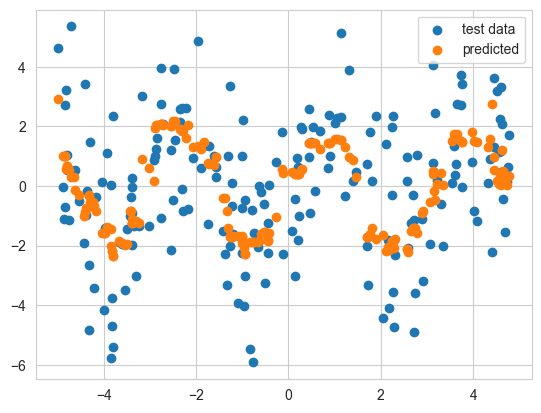

In [13]:
predict1 = forest_cv1.predict(X=X1_test)
plt.scatter(X1_test, y1_test, label="test data")
plt.scatter(X1_test, predict1, label="predicted")
plt.legend()
plt.show()

## Cross validate random forest on dataset 2

In [14]:
param_grid = {"max_depth": range(2, 22, 2)}
forest_cv2 = GridSearchCV(
    RandomForestRegressor(random_state=0),
    param_grid=param_grid,
)
forest_cv2.fit(X=X2_train, y=y2_train)
print(f"best hyperparameter is {forest_cv2.best_params_}")
print(f"R-squared on the test data is {forest_cv2.score(X=X2_test, y=y2_test):.2%}")

best hyperparameter is {'max_depth': 4}
R-squared on the test data is 51.19%


## Cross validate neural network on dataset 1

In [15]:
from sklearn.neural_network import MLPRegressor

param_grid = {"hidden_layer_sizes": [[100], [100, 100], [100, 100, 100]]}

net_cv1 = GridSearchCV(
    MLPRegressor(random_state=0, max_iter=1000),
    param_grid=param_grid,
)
net_cv1.fit(X=X1_train, y=y1_train)

print(f"best hyperparameter is {net_cv1.best_params_}")
print(f"R-squared on the test data is {net_cv1.score(X=X1_test, y=y1_test):.2%}")

best hyperparameter is {'hidden_layer_sizes': [100, 100, 100]}
R-squared on the test data is 25.75%


### View fit of the best neural network on the test data if we want

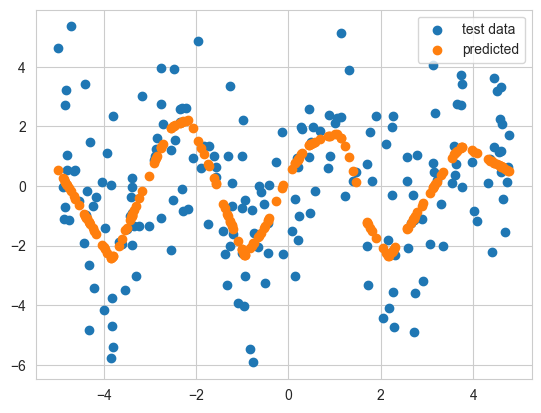

In [16]:
predict1 = net_cv1.predict(X=X1_test)
plt.scatter(X1_test, y1_test, label="test data")
plt.scatter(X1_test, predict1, label="predicted")
plt.legend()
plt.show()

## Cross-validate neural network on dataset 2

In [17]:
param_grid = {"hidden_layer_sizes": [[100], [100, 100], [100, 100, 100]]}

net_cv2 = GridSearchCV(
    MLPRegressor(random_state=0, max_iter=1000),
    param_grid=param_grid,
)
net_cv2.fit(X=X2_train, y=y2_train)

print(f"best hyperparameter is {net_cv2.best_params_}")
print(f"R-squared on the test data is {net_cv2.score(X=X2_test, y=y2_test):.2%}")

best hyperparameter is {'hidden_layer_sizes': [100, 100]}
R-squared on the test data is 5.55%


## Linear regression

- No hyperparameters
- Train on the training data (instead of cross-validating)
- Test on the test data

## Linear regression on both datasets

In [18]:
from sklearn.linear_model import LinearRegression 

linear1 = LinearRegression()
linear1.fit(X=X1_train, y=y1_train)
test1 = linear1.score(X=X1_test, y=y1_test)

linear2 = LinearRegression()
linear2.fit(X=X2_train, y=y2_train)
test2 = linear2.score(X=X2_test, y=y2_test)

print(f"R-squared for dataset 1 test data is {test1:.2%}")
print(f"R-squared for dataset 2 test data is {test2:.2%}")

R-squared for dataset 1 test data is 1.18%
R-squared for dataset 2 test data is 40.97%


### View regression coefficients if we want

In [19]:
np.round(linear2.coef_, 3)

array([ 0.993,  0.058, -0.032, -0.037,  0.014,  0.033, -0.002,  0.014,
       -0.032,  0.015,  0.035, -0.004, -0.07 , -0.038,  0.03 , -0.04 ,
       -0.007,  0.045,  0.002, -0.012, -0.014, -0.089, -0.007,  0.002,
       -0.052,  0.01 ,  0.012, -0.111, -0.003, -0.038,  0.01 , -0.049,
        0.115,  0.054,  0.053,  0.032, -0.027, -0.022, -0.033, -0.003,
       -0.047, -0.03 ,  0.005, -0.034, -0.004, -0.041, -0.083,  0.054,
        0.031, -0.007,  0.021,  0.049, -0.027, -0.073,  0.033,  0.023,
        0.038,  0.035,  0.004,  0.05 , -0.018,  0.003, -0.078,  0.021,
        0.008, -0.016, -0.003, -0.014, -0.028, -0.037, -0.022,  0.075,
        0.003, -0.021, -0.111,  0.023, -0.015,  0.02 ,  0.015,  0.018,
       -0.01 , -0.043, -0.091,  0.044, -0.014, -0.03 ,  0.017, -0.025,
        0.095, -0.001, -0.022, -0.043, -0.072, -0.019,  0.052,  0.028,
        0.006,  0.016, -0.046, -0.036])

## Lasso

- OLS minimizes the mean squared error.  Lasso is an example of penalized linear regression.  It chooses coefficients to minimize

$$\frac{1}{2}\text{MSE} + \text{penalty} \times \sum_{i=1}^n |\beta_i|$$

- The penalty is a hyperparameter.  It is called "alpha" (not the regression intercept).

- The larger the penalty, the smaller the estimated betas will be.  For large alpha, the estimated betas will be zeros.

- Penalizing is a way to reduce model complexity and avoid overfitting.

## Cross-validation for lasso on dataset 1

In [20]:
from sklearn.linear_model import Lasso

param_grid = {"alpha": np.arange(0.1, 2.1, 0.1)}

lasso_cv1 = GridSearchCV(Lasso(), param_grid=param_grid)
lasso_cv1.fit(X1_train, y1_train)

print(f"best hyperparameter is {lasso_cv1.best_params_}")
print(f"R-squared on the test data is {lasso_cv1.score(X1_test, y1_test):.2%}")

best hyperparameter is {'alpha': 0.1}
R-squared on the test data is 1.12%


## Cross-validation for lasso on dataset 2

In [21]:
param_grid = {"alpha": np.arange(0.1, 2.1, 0.1)}

lasso_cv2 = GridSearchCV(Lasso(), param_grid=param_grid)
lasso_cv2.fit(X2_train, y2_train)

print(f"best hyperparameter is {lasso_cv2.best_params_}")
print(f"R-squared on the test data is {lasso_cv2.score(X2_test, y2_test):.2%}")

best hyperparameter is {'alpha': 0.1}
R-squared on the test data is 51.76%


### View the regression coefficients if we want

In [22]:
lasso = Lasso(alpha=0.1)
lasso.fit(X2_train, y2_train)
np.round(lasso.coef_, 3)

array([ 0.898,  0.   , -0.   , -0.   ,  0.   ,  0.   , -0.   ,  0.   ,
       -0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   ,
       -0.   ,  0.   , -0.   ,  0.   , -0.   , -0.   , -0.   ,  0.   ,
       -0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   ,
        0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ,
        0.   , -0.   ,  0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   ,
        0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ,
        0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
       -0.   , -0.   , -0.009,  0.   ,  0.   , -0.   , -0.   , -0.   ,
        0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ,  0.   ,
        0.   ,  0.   , -0.   , -0.   ])

## Some real data

- Boston house prices
- Try to predict median house price in different neighborhoods of Boston based on characteristics of the houses and characteristics of the residents
- University of California-Irvine Machine Learning Repository and Kaggle
- See [https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data) for a description of the data.

In [23]:
url = "https://www.dropbox.com/scl/fi/g9uzsntv93waniyw9pkc2/boston.csv?rlkey=e8n7uub35p0wk2xna56ptfx23&dl=1"
df = pd.read_csv(url)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [24]:
X = df.drop(columns=["MEDV"])
y = df.MEDV

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

### Tasks

1.  Run GridSearchCV on training data to find best hyperparameter
2.  Test the model on the test data

Do this for

1.  Random forest with 

        param_grid = {"max_depth": range(2, 22, 2)}
    
2.  Neural network with 

        param_grid = {"hidden_layer_sizes": [[100], [100, 100], [100, 100, 100]]}

Can chatGPT help?